In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def remove_salutation(txt):
    """
    Removes the salutation and special characters from a given inputted text
    
    Example -
    
    Input  - 'Mr. Bhavesh  Bhatt'
    Output - 'bhavesh bhatt'
    
    """
    special_characters = [',','@','_','.']
    for sp in special_characters:
        txt = txt.replace(sp," ")
    txt = txt.lower()
    txt = ' '.join(txt.split()) #Replace multiple spaces with single space
    salutation = ['dr ','miss ','mr ','mrs ','sir ']
    for sals in salutation:
        if sals in txt:
            txt = txt.replace(sals,'')
    txt = ''.join([i for i in txt if not i.isdigit()]) #Converting names to just character only
    return txt

In [3]:
def extract_domain_name(email):
    """
    Extract the domain name from an email and return a null if the domain name already present in
    the reject_domain_check list
    
    Example -
    
    Input  - 'xyz@uber.com'
    Output - 'uber'
    
    Input  - 'xyz@gmail.com'
    Output - ''
    
    """
    reject_domain_check = ['gmail','yahoo','rediffmail','sujit','hotmail','outlook','ymail',\
                           'live','gamil','email','mail','gmai','gmil','icloud','rocketmail',\
                           'gimel','gmal','test','rediff','aol','gmaill','flexiloans']
    
    if email and '@' in email:
            if len(email.split("@"))>1:
                domain = email.split("@")[1].split(".")[0]
                domain = domain.lower()
                for rj_dom in reject_domain_check:
                    if rj_dom in domain:
                        domain = ''
                return domain
    else:
        return email

In [4]:
def extract_text_from_email(email):
    """
    Extract the username from an email and also discards special characters and numbers
    
    Example -
    
    Input  - 'xyz123_124a@gmail.com'
    Output - 'xyza'
    
    """
    new_email = ''
    if email:
        email = email.split("@")[0]
        for characters in email:
            if characters.isalpha():
                new_email +=characters
    return new_email.lower()

In [5]:
def username_validity(email):
    """
    Return the username of the email as is if its length is greater than equal to 4 
    
    """
    out = ''
    if len(email) >= 4:
        out = email
    return out

In [6]:
def modify_business_name(txt):
    """
    Modify the business name by discarding special characters and numbers
    
    Example -
    
    Input  - 'JAI LAXMI MARKETING'
    Output - 'jailaxmimarketing'
   
    """
    special_characters = ['.','@','_']
    for sp in special_characters:
        txt = txt.replace(sp," ")
    txt = txt.lower()
    txt = ''.join(txt.split())                          #Replace multiple spaces with single space
    txt = ''.join([i for i in txt if not i.isdigit()])  #Converting names to just character only
    return txt

In [7]:
def get_all_substrings(input_string):
    """
    Generate all substrings from the name of the person having length greater than or equal to 3
    
    Input  - 'bhavesh'
    Output - 
    ['bha','bhav','bhave','bhaves','bhavesh','hav','have', 'haves', 'havesh', 
     'ave', 'aves', 'avesh', 'ves', 'vesh', 'esh']
     
    """
    length = len(input_string)
    return [input_string[i:j+1] for i in range(length) for j in range(i+2,length)]

In [8]:
def count_of_namesubstring_in_email(substring_names,email):
    """
    Return the length of the longest matching substring sequence that matches the email text field
    
    Input  - 
    ['bha','bhav','bhave','bhaves','bhavesh','hav','have', 'haves', 'havesh', 
     'ave', 'aves', 'avesh', 'ves', 'vesh', 'esh']
     and 
     'bhavesh'

    Output - 7
    
    """
    match_count = 0
    temp_list = []
    for names in substring_names:
        if names in email:
            temp_list.append(names)
            match_count = len(max(temp_list,key=len))
    return match_count

In [9]:
def similarity_name_email (detail):
    """
    Return the similarity score between name and email
    
    Input  - bhavesh bhatt, bhattbhavesh
    Output - 100
    
    """
    full_name,email = detail
    if len(email):
        if full_name.count(' ') >= 2:
            f_name = full_name.split(' ')[0]
            m_name = full_name.split(' ')[1]
            s_name = full_name.split(' ')[2]
            fname_similarity = count_of_namesubstring_in_email(get_all_substrings(f_name),email)/float(len(email))
            mname_similarity = count_of_namesubstring_in_email(get_all_substrings(m_name),email)/float(len(email))
            sname_similarity = count_of_namesubstring_in_email(get_all_substrings(s_name),email)/float(len(email))
            if int((fname_similarity + mname_similarity + sname_similarity)*100) > 100:
                return 100
            else:
                return int((fname_similarity + mname_similarity + sname_similarity)*100)
        if full_name.count(' ') == 1:
            f_name = full_name.split(' ')[0]
            s_name = full_name.split(' ')[1]
            fname_similarity = count_of_namesubstring_in_email(get_all_substrings(f_name),email)/float(len(email))
            sname_similarity = count_of_namesubstring_in_email(get_all_substrings(s_name),email)/float(len(email))
            if int((fname_similarity + sname_similarity)*100) > 100:
                return 100
            else:
                return int((fname_similarity + sname_similarity)*100)
        else:
            name_similarity = count_of_namesubstring_in_email(get_all_substrings(full_name),email)/float(len(email))
            return int(name_similarity*100)
    else:
        return 0

In [10]:
def similarity_businessname_email(detail):
    """
    Returns the similarity score between business name and email
    
    """
    business_name,email = detail
    if len(email):
        bname_similarity = count_of_namesubstring_in_email(get_all_substrings(business_name),email)/float(len(email))
        return int((bname_similarity*100))
    else:
        return 0

In [11]:
def similarity_businessname_domain(detail):
    """
    Returns the similarity score between domain and business name
    
    """
    business_name,domain = detail
    if len(domain):
        bname_similarity = count_of_namesubstring_in_email(get_all_substrings(business_name),domain)/float(len(domain))
        return int((bname_similarity*100))
    else:
        return 0

In [12]:
def max_similar_score(scores):
    """
    Return the maximum score out of the 3 scores
    
    Input  - (10,20,30)
    
    Output - 30
    
    """    
    score1, score2,score3 = scores
    return max(score1,score2,score3)

In [13]:
name_email_data = pd.read_csv('name_email_business_details.csv')

In [14]:
name_email_data = name_email_data.fillna('')

In [ ]:
name_email_data.head()

In [15]:
print "Total number of rows = ",name_email_data.shape[0]

Total number of rows =  30094


In [16]:
print "Total number of entries with no email = ",name_email_data[name_email_data['email']==''].shape[0]

Total number of entries with no email =  2769


In [17]:
name_email_data = name_email_data[name_email_data['email']!=''].reset_index(drop=True)

In [ ]:
name_email_data.head()

In [18]:
name_email_data.loc[:,"name1"] = name_email_data['name'].apply(remove_salutation)

In [19]:
name_email_data.loc[:,"business_name1"] = name_email_data['business_name'].apply(modify_business_name)

In [20]:
name_email_data.loc[:,"new_email"] = name_email_data['email'].apply(extract_text_from_email)

In [21]:
name_email_data.loc[:,"domain_name"] = name_email_data['email'].apply(extract_domain_name)

In [22]:
name_email_data['new_email1'] = name_email_data['new_email'].apply(username_validity)

In [23]:
name_email_data = name_email_data.drop(['name','email','new_email','business_name'], 1).\
rename(columns={'name1': 'name','new_email1': 'email','business_name1':'b_name'})

In [ ]:
name_email_data.head()

In [24]:
name_email_data = name_email_data[name_email_data['email']!=''].reset_index(drop=True)

In [ ]:
name_email_data['domain_name'].value_counts().head()

In [25]:
name_email_data['name_similarity'] = name_email_data[['name','email']].apply(similarity_name_email,axis=1)

In [ ]:
name_email_data.head()

In [ ]:
name_email_data.iloc[0,:]

In [26]:
name_email_data['b_name_similarity'] = name_email_data[['b_name','email']].\
apply(similarity_businessname_email,axis=1)

In [ ]:
name_email_data.head(10)

In [27]:
name_email_data['b_domain_similarity'] = name_email_data[['b_name','domain_name']].\
apply(similarity_businessname_domain,axis=1)

In [ ]:
name_email_data.head()

In [28]:
name_email_data['final_score'] = name_email_data[['name_similarity','b_name_similarity','b_domain_similarity']]\
                                .apply(max_similar_score,axis=1)

In [ ]:
name_email_data.head()

In [29]:
print "Total Number of rows in the dataset = " +str(name_email_data['final_score'].count())

Total Number of rows in the dataset = 26613


In [30]:
x = name_email_data['final_score']

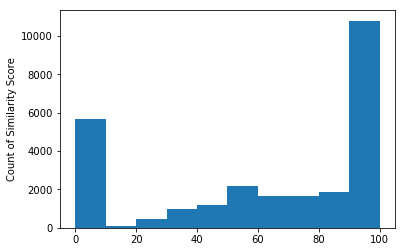

In [31]:
plt.hist(x, bins=10)
plt.ylabel('Count of Similarity Score');

In [ ]:
name_email_data[name_email_data['final_score'] == 100].head()

In [32]:
Nr100 = name_email_data[name_email_data['final_score'] == 100].shape[0]
Dr = name_email_data['final_score'].shape[0]
print "Percentage of records with 100% similarity = ", str((Nr100/float(Dr)*100))

Percentage of records with 100% similarity =  37.9551347086


In [ ]:
name_email_data[name_email_data['final_score'] == 40].head()

In [ ]:
name_email_data.iloc[1608,:]

In [33]:
Nr0 = name_email_data[name_email_data['final_score'] == 0].shape[0]
Dr = name_email_data['final_score'].shape[0]
print "Percentage of records with 0% similarity = ", str((Nr0/float(Dr)*100))

Percentage of records with 0% similarity =  21.3955585616


In [ ]:
name_email_data[(name_email_data['final_score'] >= 20) &(name_email_data['final_score'] <= 30)].head()

In [34]:
Nr40plus = name_email_data[name_email_data['final_score'] >= 40].shape[0]
Dr = name_email_data['final_score'].shape[0]
print "Percentage of records greater than 40% similarity = ", str((Nr40plus/float(Dr)*100))

Percentage of records greater than 40% similarity =  72.7013113892


In [ ]:
name_email_data[name_email_data['final_score'] == 0]

In [ ]:
name_email_data.iloc[189,:]

In [ ]:
similarity_name_email(('mergu sreenivasa rao','srinumrg'))

In [ ]:
similarity_name_email(('sange','sange'))

In [ ]:
name_email_data[name_email_data['final_score']==40]

In [ ]:
name_email_data[name_email_data['final_score']==10]

In [ ]:
name_email_data[name_email_data['final_score']==20]

In [ ]:
name_email_data.iloc[25553,:]